In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Урок 1.**<br>
<b>Домашнее задание: оптимизировать x^2*(np.sin(0,5*_x)^2+1)</b>
<ul>
<li>При каких значениях alpha оптимизация проходит успешно, а при каких "застревает"?</li></ul>

In [2]:
np.random.seed(14)

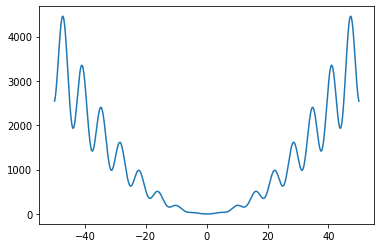

In [3]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)  # Находим производную по фурмулам
plt.plot(x, func2(x))
plt.show()

In [4]:
def true_grad2(_x): return _x*(2+2*np.sin(0.5*_x)**2+_x*np.sin(0.5*_x)*np.cos(0.5*_x))
def calculate_grad(func, x0, delta=0.00001): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.00001): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [5]:
x0=np.random.uniform(-50, 50)
print('true grad', true_grad2(x0))
print('method1', calculate_grad(func2, x0))
print('method2', calculate_grad2(func2, x0)) # Из вычислительных методов этот точнее, чем предыдущий

true grad 4.895219751388413
method1 4.895248453706813
method2 4.895219751444024


In [47]:
x0=np.random.uniform(-50, 50)
print(x0)
alpha=0.05
w_list=[]
for x in range(500):
  if x%10==0:
    print(x0, func2(x0))
  w_list.append([x0, func2(x0)])
  x0-=alpha*true_grad2(x0)
w_list=np.array(w_list)

-24.24075670793823
-24.24075670793823 696.9491276962847
-0.4955023724880867 0.2602871081659824
-0.16286675415347052 0.026701092721198864
-0.056405393836721204 0.0031840983774651605
-0.019651293917755802 0.0003862106339068231
-0.006851302981164856 4.694090338673783e-05
-0.002388872834698586 5.706721562001502e-06
-0.0008329472326976052 6.938012127985805e-07
-0.0002904306900272683 8.434998748844519e-08
-0.00010126691776190617 1.0254988659287866e-08
-3.530959082595157e-05 1.2467672046847303e-09
-1.2311693045819478e-05 1.5157778566022366e-10
-4.292821926039222e-06 1.8428320088767993e-11
-1.4968144527913483e-06 2.240453506086319e-12
-5.219069285181221e-07 2.7238684203523875e-13
-1.8197769371306827e-07 3.311588100912756e-14
-6.345169837686768e-08 4.026118026908997e-15
-2.2124239211741892e-08 4.894819606983776e-16
-7.714245216749416e-09 5.950957926414124e-17
-2.689790988725072e-09 7.2349755630266e-18
-9.378721261436951e-10 8.796041249972953e-19
-3.27015789957054e-10 1.0693932688123606e-19
-1.1

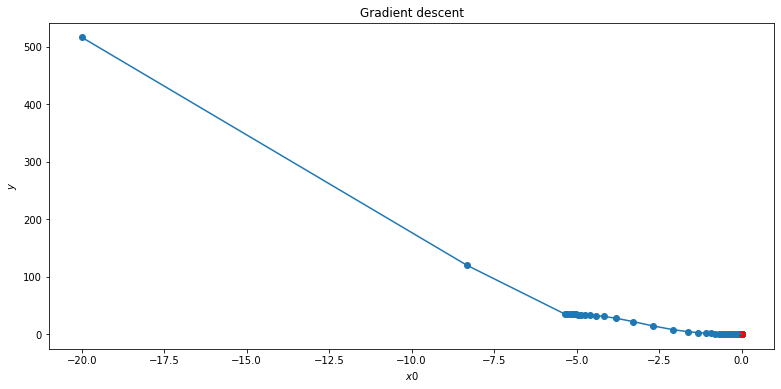

In [44]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$x0$')
plt.ylabel(r'$y$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(0, 0, c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Отвечая на вопрос о подходящих значениях alpha, его должно быть достаточно, чтобы преодолеть локальные минимумы. В частности при значении 0.5 "застреваний" уже не происходит и это подтверждается геометрически графиком оптимизируемой функции.<br>
При значениях 0.3 и ниже происходит "застревание" в локальных минимумах.